# Lietuvos aukštosiose mokyklose studijuojančių užsienio piliečių skaičiaus dinamika 2012-2021 metais

Darbo tikslas - nustatyti, kokią įtaką į Lietuvą studijuoti atvykstančių užsienio piliečių skaičiui turi politiniai įvykiai ir auštųjų mokyklų "marketingo" kampanijos.

Darbo uždaviniai:

1. Įvertinti Covid-19 pandemijos įtaką atvykstančių studentų skaičiui.

2. Įvertinti Baltarusijos respublikoje po 2020 m. prezidento rinkimų susidariusios politinės situacijos įtaką iš Baltarusijos respublikos atvykstančių studentų skaičiui.

3. Įvertinti Vilniaus Gedimino technikos universiteto tarptautiškumo skatinimo rezultatus Covid-19 pandemijos metu. (2020 m. pristatytas naujas universiteto prekės ženklas bei sutrumpintas viešojoje komunikacijoje naudojamas pavadinimas - Vilnius Tech)

Duomenų šaltinis: data.gov.lt

## Duomenų atsisiuntimas ir paruošimas darbui

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#studentai = pd.read_csv('C:\\Users\\Owner\\Documents\\DA_kursai\\Data_set\\aukstosios\\uzsienieciai_ok.csv')
#studentai

,Mokslo_metai,Institucijos_savivaldybės_ID,Institucijos_savivaldybė,Institucijos_tipo_ID,Institucijos_tipas,Institucijos_kodas,Institucijos_pavadinimas,Pilietybės_raidinis_kodas,Pilietybė,Studijų_sritis_kodas,Studijų_sritis,Studijų_krypčių_grupė_kodas,Studijų_krypčių_grupė,Studijų_pakopa_ID,Studijų_pakopa,Atvykusių_studentų_skaičius
0,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BEL,BELGIJOS KARALYSTĖS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
1,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BGR,BULGARIJOS RESPUBLIKOS,M,Meno studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,2
2,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CYP,KIPRO RESPUBLIKOS,M,Meno studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,2
3,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CZE,ČEKIJOS RESPUBLIKOS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
4,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,DEU,VOKIETIJOS FEDER. RESPUBLIKOS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,K,Teisė,12,Antrosios pakopos studijos,6
5052,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,L,Verslo ir viešoji vadyba,12,Antrosios pakopos studijos,22
5053,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,M,Ugdymo mokslai,12,Antrosios pakopos studijos,2
5054,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,N,Humanitariniai mokslai,12,Antrosios pakopos studijos,6


In [28]:
import mysql.connector
mydb = mysql.connector.connect(
    host="127.0.0.1",
    port="3317",
    user="root",
    password="Br0kol15",
)
cursor = mydb.cursor()
cursor.execute('USE studentai')
studentai = pd.read_sql('SELECT * FROM studentai', con=mydb)
studentai

,STa Mokslo metai,STa Institucijos savivaldybės ID,STa Institucijos savivaldybė,STa Institucijos tipo ID,STa Institucijos tipas,STa Institucijos kodas,STa Institucijos pavadinimas,STa Pilietybės raidinis kodas,STa Pilietybė,STa Studijų sritis kodas,STa Studijų sritis,STa Studijų krypčių grupė kodas,STa Studijų krypčių grupė,STa Studijų pakopa ID,STa Studijų pakopa,STa Atvykusių studentų skaičius
0,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BEL,BELGIJOS KARALYSTĖS,S,Socialinių mokslų studijų sritis,,,11,Pirmosios pakopos studijos,1
1,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BGR,BULGARIJOS RESPUBLIKOS,M,Meno studijų sritis,,,11,Pirmosios pakopos studijos,2
2,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CYP,KIPRO RESPUBLIKOS,M,Meno studijų sritis,,,11,Pirmosios pakopos studijos,2
3,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CZE,ČEKIJOS RESPUBLIKOS,S,Socialinių mokslų studijų sritis,,,11,Pirmosios pakopos studijos,1
4,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,DEU,VOKIETIJOS FEDER. RESPUBLIKOS,S,Socialinių mokslų studijų sritis,,,11,Pirmosios pakopos studijos,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,,,K,Teisė,12,Antrosios pakopos studijos,6
5052,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,,,L,Verslo ir viešoji vadyba,12,Antrosios pakopos studijos,22
5053,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,,,M,Ugdymo mokslai,12,Antrosios pakopos studijos,2
5054,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,,,N,Humanitariniai mokslai,12,Antrosios pakopos studijos,6


In [3]:
studentai.info

<bound method DataFrame.info of      STa Mokslo metai  STa Institucijos savivaldybės ID  \
0           2012-2013                                43   
1           2012-2013                                43   
2           2012-2013                                43   
3           2012-2013                                43   
4           2012-2013                                43   
...               ...                               ...   
5051        2021-2022                               461   
5052        2021-2022                               461   
5053        2021-2022                               461   
5054        2021-2022                               461   
5055        2021-2022                               461   

     STa Institucijos savivaldybė  STa Institucijos tipo ID  \
0                   Kauno m. sav.                      3911   
1                   Kauno m. sav.                      3911   
2                   Kauno m. sav.                      3911   
3      

In [3]:
studentai.rename(columns = {'Pilietybės_raidinis_kodas' : 'Šalies_kodas',
                            'Studijų_sritis_kodas' : 'Studijų_srities_kodas'},
                 inplace = True)
studentai

,Mokslo_metai,Institucijos_savivaldybės_ID,Institucijos_savivaldybė,Institucijos_tipo_ID,Institucijos_tipas,Institucijos_kodas,Institucijos_pavadinimas,Šalies_kodas,Pilietybė,Studijų_srities_kodas,Studijų_sritis,Studijų_krypčių_grupė_kodas,Studijų_krypčių_grupė,Studijų_pakopa_ID,Studijų_pakopa,Atvykusių_studentų_skaičius
0,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BEL,BELGIJOS KARALYSTĖS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
1,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BGR,BULGARIJOS RESPUBLIKOS,M,Meno studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,2
2,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CYP,KIPRO RESPUBLIKOS,M,Meno studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,2
3,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CZE,ČEKIJOS RESPUBLIKOS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
4,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,DEU,VOKIETIJOS FEDER. RESPUBLIKOS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,K,Teisė,12,Antrosios pakopos studijos,6
5052,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,L,Verslo ir viešoji vadyba,12,Antrosios pakopos studijos,22
5053,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,M,Ugdymo mokslai,12,Antrosios pakopos studijos,2
5054,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,NaN,NaN,N,Humanitariniai mokslai,12,Antrosios pakopos studijos,6


In [48]:
studentai['Studijų_sritis'].value_counts()

Socialinių mokslų studijų sritis       2333
Technologijos mokslų studijų sritis    1017
Humanitarinių mokslų studijų sritis     630
Meno studijų sritis                     428
Biomedicinos mokslų studijų sritis      384
Fizinių mokslų studijų sritis           238
Name: Studijų_sritis, dtype: int64

In [49]:
studentai['Studijų_krypčių_grupė'].value_counts()

Verslo ir viešoji vadyba    568
Socialiniai mokslai         426
Inžinerijos mokslai         284
Humanitariniai mokslai      278
Informatikos mokslai        260
Menai                       233
Teisė                       167
Sveikatos mokslai           128
Ugdymo mokslai               80
Technologijų mokslai         78
Gyvybės mokslai              55
Fiziniai mokslai             51
Matematikos mokslai          26
Sportas                      19
Žemės ūkio mokslai            6
Veterinarijos mokslai         6
Visuomenės saugumas           2
Name: Studijų_krypčių_grupė, dtype: int64

In [4]:
# Trūkstamų studijų srities stulpelio verčių priskyrimas
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Verslo ir viešoji vadyba'), 'Studijų_srities_kodas'] = 'S'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Verslo ir viešoji vadyba'), 'Studijų_sritis'] = 'Socialinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Socialiniai mokslai'), 'Studijų_srities_kodas'] = 'S'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Socialiniai mokslai'), 'Studijų_sritis'] = 'Socialinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Teisė'), 'Studijų_srities_kodas'] = 'S'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Teisė'), 'Studijų_sritis'] = 'Socialinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Ugdymo mokslai'), 'Studijų_srities_kodas'] = 'S'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Ugdymo mokslai'), 'Studijų_sritis'] = 'Socialinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Visuomenės saugumas'), 'Studijų_srities_kodas'] = 'S'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Visuomenės saugumas'), 'Studijų_sritis'] = 'Socialinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Humanitariniai mokslai'), 'Studijų_srities_kodas'] = 'H'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Humanitariniai mokslai'), 'Studijų_sritis'] = 'Humanitarinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Inžinerijos mokslai'), 'Studijų_srities_kodas'] = 'T'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Inžinerijos mokslai'), 'Studijų_sritis'] = 'Technologijos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Informatikos mokslai'), 'Studijų_srities_kodas'] = 'T'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Informatikos mokslai'), 'Studijų_sritis'] = 'Technologijos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Technologijų mokslai'), 'Studijų_srities_kodas'] = 'T'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Technologijų mokslai'), 'Studijų_sritis'] = 'Technologijos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Menai'), 'Studijų_srities_kodas'] = 'M'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Menai'), 'Studijų_sritis'] = 'Meno studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Fiziniai mokslai'), 'Studijų_srities_kodas'] = 'P'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Fiziniai mokslai'), 'Studijų_sritis'] = 'Fizinių mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Sveikatos mokslai'), 'Studijų_srities_kodas'] = 'B'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Sveikatos mokslai'), 'Studijų_sritis'] = 'Biomedicinos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Gyvybės mokslai'), 'Studijų_srities_kodas'] = 'B'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Gyvybės mokslai'), 'Studijų_sritis'] = 'Biomedicinos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Sportas'), 'Studijų_srities_kodas'] = 'B'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Sportas'), 'Studijų_sritis'] = 'Biomedicinos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Žemės ūkio mokslai'), 'Studijų_srities_kodas'] = 'B'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Žemės ūkio mokslai'), 'Studijų_sritis'] = 'Biomedicinos mokslų studijų sritis'

studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Veterinarijos mokslai'), 'Studijų_srities_kodas'] = 'B'
studentai.loc[(studentai['Studijų_krypčių_grupė'] == 'Veterinarijos mokslai'), 'Studijų_sritis'] = 'Biomedicinos mokslų studijų sritis'

studentai

,Mokslo_metai,Institucijos_savivaldybės_ID,Institucijos_savivaldybė,Institucijos_tipo_ID,Institucijos_tipas,Institucijos_kodas,Institucijos_pavadinimas,Šalies_kodas,Pilietybė,Studijų_srities_kodas,Studijų_sritis,Studijų_krypčių_grupė_kodas,Studijų_krypčių_grupė,Studijų_pakopa_ID,Studijų_pakopa,Atvykusių_studentų_skaičius
0,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BEL,BELGIJOS KARALYSTĖS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
1,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,BGR,BULGARIJOS RESPUBLIKOS,M,Meno studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,2
2,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CYP,KIPRO RESPUBLIKOS,M,Meno studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,2
3,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,CZE,ČEKIJOS RESPUBLIKOS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
4,2012-2013,43,Kauno m. sav.,3911,Kolegija,111965284,Kauno kolegija,DEU,VOKIETIJOS FEDER. RESPUBLIKOS,S,Socialinių mokslų studijų sritis,NaN,NaN,11,Pirmosios pakopos studijos,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,K,Teisė,12,Antrosios pakopos studijos,6
5052,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,L,Verslo ir viešoji vadyba,12,Antrosios pakopos studijos,22
5053,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,M,Ugdymo mokslai,12,Antrosios pakopos studijos,2
5054,2021-2022,461,Vilniaus m. sav.,3912,Universitetas,211950810,Vilniaus universitetas,YYY,NEŽINOMOS,H,Humanitarinių mokslų studijų sritis,N,Humanitariniai mokslai,12,Antrosios pakopos studijos,6


In [5]:
# Darbui naudojamų stulpelių atsirinkimas
studpap = studentai.loc[0:5055, ['Mokslo_metai', 'Institucijos_savivaldybė', 'Institucijos_tipas', 'Institucijos_pavadinimas', 
                       'Šalies_kodas', 'Pilietybė', 'Studijų_srities_kodas', 'Studijų_sritis', 'Studijų_pakopa',
                       'Atvykusių_studentų_skaičius']]
studpap

,Mokslo_metai,Institucijos_savivaldybė,Institucijos_tipas,Institucijos_pavadinimas,Šalies_kodas,Pilietybė,Studijų_srities_kodas,Studijų_sritis,Studijų_pakopa,Atvykusių_studentų_skaičius
0,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,BEL,BELGIJOS KARALYSTĖS,S,Socialinių mokslų studijų sritis,Pirmosios pakopos studijos,1
1,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,BGR,BULGARIJOS RESPUBLIKOS,M,Meno studijų sritis,Pirmosios pakopos studijos,2
2,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,CYP,KIPRO RESPUBLIKOS,M,Meno studijų sritis,Pirmosios pakopos studijos,2
3,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,CZE,ČEKIJOS RESPUBLIKOS,S,Socialinių mokslų studijų sritis,Pirmosios pakopos studijos,1
4,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,DEU,VOKIETIJOS FEDER. RESPUBLIKOS,S,Socialinių mokslų studijų sritis,Pirmosios pakopos studijos,1
...,...,...,...,...,...,...,...,...,...,...
5051,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,6
5052,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,22
5053,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,2
5054,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,H,Humanitarinių mokslų studijų sritis,Antrosios pakopos studijos,6


In [6]:
# NaN verčių pašalinimas
students = studpap.dropna()
students

,Mokslo_metai,Institucijos_savivaldybė,Institucijos_tipas,Institucijos_pavadinimas,Šalies_kodas,Pilietybė,Studijų_srities_kodas,Studijų_sritis,Studijų_pakopa,Atvykusių_studentų_skaičius
0,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,BEL,BELGIJOS KARALYSTĖS,S,Socialinių mokslų studijų sritis,Pirmosios pakopos studijos,1
1,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,BGR,BULGARIJOS RESPUBLIKOS,M,Meno studijų sritis,Pirmosios pakopos studijos,2
2,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,CYP,KIPRO RESPUBLIKOS,M,Meno studijų sritis,Pirmosios pakopos studijos,2
3,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,CZE,ČEKIJOS RESPUBLIKOS,S,Socialinių mokslų studijų sritis,Pirmosios pakopos studijos,1
4,2012-2013,Kauno m. sav.,Kolegija,Kauno kolegija,DEU,VOKIETIJOS FEDER. RESPUBLIKOS,S,Socialinių mokslų studijų sritis,Pirmosios pakopos studijos,1
...,...,...,...,...,...,...,...,...,...,...
5050,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,17
5051,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,6
5052,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,22
5053,2021-2022,Vilniaus m. sav.,Universitetas,Vilniaus universitetas,YYY,NEŽINOMOS,S,Socialinių mokslų studijų sritis,Antrosios pakopos studijos,2


In [187]:
students.to_csv('students.csv')

## Covid-19 pandemijos įtaką atvykstančių studentų skaičiui

### 2012-2021 metais atvykusių studentų skaičius

In [62]:
pagal_metus = students.groupby('Mokslo_metai')['Atvykusių_studentų_skaičius'].sum()
pagal_metus

Mokslo_metai
2012-2013    1204
2013-2014    1240
2014-2015    1443
2015-2016    1670
2016-2017    1794
2017-2018    1832
2018-2019    2196
2019-2020    2256
2020-2021    1260
2021-2022    2259
Name: Atvykusių_studentų_skaičius, dtype: int64

<AxesSubplot:title={'center':'Atvykusių studentų skaičius pagal metus'}, xlabel='Mokslo_metai'>

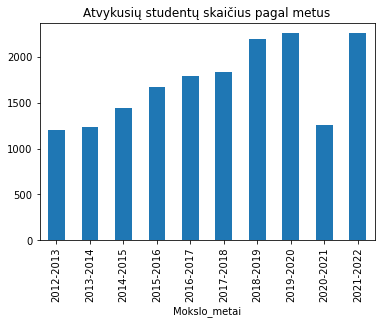

In [69]:
pagal_metus.plot(x = 'Mokslo_metai', title = 'Atvykusių studentų skaičius pagal metus', kind = 'bar')

In [179]:
100 - ((1260 / 2256) * 100)

44.14893617021277

### 2020 ir 2021 atvykusių studentų skaičiaus palyginimas su prognoze

In [134]:
Xpagal_metus = pd.DataFrame(pagal_metus).reset_index()
Xpagal_metus['Atvykimo_metai'] = range(2012, 2022)
Xpagal_metus

,Mokslo_metai,Atvykusių_studentų_skaičius,Atvykimo_metai
0,2012-2013,1204,2012
1,2013-2014,1240,2013
2,2014-2015,1443,2014
3,2015-2016,1670,2015
4,2016-2017,1794,2016
5,2017-2018,1832,2017
6,2018-2019,2196,2018
7,2019-2020,2256,2019
8,2020-2021,1260,2020
9,2021-2022,2259,2021


In [136]:
from sklearn.linear_model import LinearRegression

In [144]:
X = Xpagal_metus[['Atvykimo_metai']].iloc[0:8]
X

,Atvykimo_metai
0,2012
1,2013
2,2014
3,2015
4,2016
5,2017
6,2018
7,2019


In [145]:
y = Xpagal_metus[[ 'Atvykusių_studentų_skaičius']].iloc[0:8]
y

,Atvykusių_studentų_skaičius
0,1204
1,1240
2,1443
3,1670
4,1794
5,1832
6,2196
7,2256


In [141]:
model = LinearRegression()
model

LinearRegression()

In [146]:
model.fit(X, y)

LinearRegression()

In [163]:
model.predict([[2020]])

array([[2424.10714286]])

In [148]:
model.predict([[2021]])

array([[2584.04761905]])

In [167]:
a = pd.DataFrame(range(2012, 2022))
prognoze = model.predict(a).round()
prognoze

array([[1145.],
       [1305.],
       [1464.],
       [1624.],
       [1784.],
       [1944.],
       [2104.],
       [2264.],
       [2424.],
       [2584.]])

In [169]:
Xpagal_metus['Prognozė'] = prognoze
Xpagal_metus

,Mokslo_metai,Atvykusių_studentų_skaičius,Atvykimo_metai,Prognozė
0,2012-2013,1204,2012,1145.0
1,2013-2014,1240,2013,1305.0
2,2014-2015,1443,2014,1464.0
3,2015-2016,1670,2015,1624.0
4,2016-2017,1794,2016,1784.0
5,2017-2018,1832,2017,1944.0
6,2018-2019,2196,2018,2104.0
7,2019-2020,2256,2019,2264.0
8,2020-2021,1260,2020,2424.0
9,2021-2022,2259,2021,2584.0


<AxesSubplot:xlabel='Mokslo_metai'>

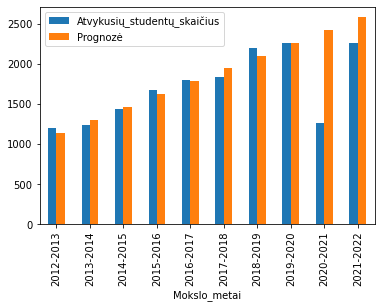

In [171]:
Xpagal_metus.plot(x = 'Mokslo_metai', y = ['Atvykusių_studentų_skaičius', 'Prognozė'], kind = 'bar')

In [180]:
100 - ((1260 / 2424) * 100)

48.01980198019802

In [181]:
100 - ((2259 / 2584) * 100)

12.577399380804948

## Iš Baltarusijos respublikos atvykusių studentų skaičius 

In [83]:
pilietybe = students.groupby('Pilietybė')['Atvykusių_studentų_skaičius'].sum().sort_values(ascending = False)
pilietybe.head(30)

Pilietybė
NEŽINOMOS                        3497
TURKIJOS RESPUBLIKOS             2106
ISPANIJOS KARALYSTĖS             1624
PRANCŪZIJOS RESPUBLIKOS          1293
ITALIJOS RESPUBLIKOS             1200
VOKIETIJOS FEDER. RESPUBLIKOS    1138
PORTUGALIJOS RESPUBLIKOS          767
KORĖJOS RESPUBLIKOS               555
KAZACHSTANO RESPUBLIKOS           408
ČEKIJOS RESPUBLIKOS               372
LATVIJOS RESPUBLIKOS              352
SLOVAKIJOS RESPUBLIKOS            318
LENKIJOS RESPUBLIKOS              298
GRUZIJOS RESPUBLIKOS              248
JUNGTINIŲ AMERIKOS VALSTIJŲ       244
JAPONIJOS                         210
KINIJOS LIAUDIES RESPUBLIKOS      182
UKRAINOS                          166
BELGIJOS KARALYSTĖS               156
NYDERLANDŲ KARALYSTĖS             151
GRAIKIJOS RESPUBLIKOS             138
RUMUNIJOS                         132
LIETUVOS RESPUBLIKOS              124
AUSTRIJOS RESPUBLIKOS             101
RUSIJOS FEDERACIJOS                99
AZERBAIDŽANO RESPUBLIKOS           83
VE

In [182]:
students[students['Pilietybė'] == 'BALTARUSIJOS RESPUBLIKOS'].groupby('Mokslo_metai')['Atvykusių_studentų_skaičius'].sum()

Mokslo_metai
2012-2013     6
2013-2014    13
2014-2015    13
2015-2016     1
2016-2017     1
2017-2018     3
2018-2019     8
2019-2020     9
Name: Atvykusių_studentų_skaičius, dtype: int64

In [85]:
students[students['Pilietybė'] == 'NEŽINOMOS'].groupby('Mokslo_metai')['Atvykusių_studentų_skaičius'].sum()

Mokslo_metai
2012-2013      41
2014-2015       1
2015-2016       2
2018-2019       1
2019-2020       1
2020-2021    1253
2021-2022    2198
Name: Atvykusių_studentų_skaičius, dtype: int64

Lentelėje trūksta įrašų apie 2020 ir 2021 metais atvykusių studentų pilietybes, todėl iš šių duomenų neįmanoma nustatyti, kiek Baltarusijos respublikos piliečių minėtais metais pradėjo studijas Lietuvos aukštosiose mokyklose. 2020 metais spaudoje buvo pasirodę pranešimų, kad Vilniaus universitetas kviečia pradėti arba tęsti studijas Lietuvoje baltarusius, kuriems aukštasis mokslas Baltarusijos respublikoje tapo neprieinamas dėl jų politinių pažiūrų, bei suteikia finansavimą 100 studentų krepšeliui. Jeigu visos vietos buvo užpildytos, tai reikštų, kad atvyko mažiausiai 10 kartų daugiau studentų nei ankstesniais metais.

## Atvykusių studentų pasiskirstymas pagal aukštasias mokyklas

In [81]:
students.groupby('Institucijos_pavadinimas')['Atvykusių_studentų_skaičius'].sum().sort_values(ascending = False)

Institucijos_pavadinimas
Vilniaus universitetas                                               3982
Vilniaus Gedimino technikos universitetas                            3036
Vytauto Didžiojo universitetas                                       2011
Mykolo Romerio universitetas                                         1928
Kauno technologijos universitetas                                    1598
Klaipėdos universitetas                                               418
Vilniaus kolegija                                                     410
Kauno kolegija                                                        385
Šiaulių universitetas                                                 344
Viešoji įstaiga LCC TARPTAUTINIS UNIVERSITETAS                        341
Klaipėdos valstybinė kolegija                                         299
Utenos kolegija                                                       291
Lietuvos sporto universitetas                                         189
Viešoji įstai

Į Vilniaus Gedimino technikos universitetą atvykusių studentų skaičius

In [8]:
def university(uni):
    return students[students['Institucijos_pavadinimas'] == uni].groupby('Mokslo_metai')['Atvykusių_studentų_skaičius'].sum()

In [10]:
vgtu = university('Vilniaus Gedimino technikos universitetas')
vgtu

Mokslo_metai
2012-2013    232
2013-2014    296
2014-2015    283
2015-2016    257
2016-2017    292
2017-2018    316
2018-2019    320
2019-2020    368
2020-2021    315
2021-2022    357
Name: Atvykusių_studentų_skaičius, dtype: int64

In [20]:
def graph(u):
    return u.plot(x = 'Mokslo_metai', title = 'Atvykusių studentų skaičius pagal metus', kind = 'bar')

<AxesSubplot:title={'center':'Atvykusių studentų skaičius pagal metus'}, xlabel='Mokslo_metai'>

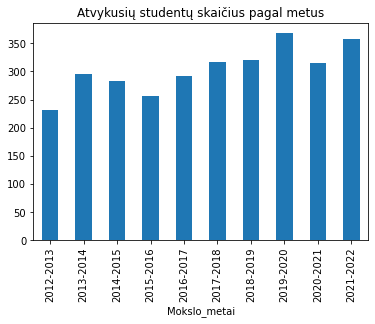

In [21]:
graph(vgtu)

Į Vilniaus universitetą atvykusių studentų skaičius

In [11]:
vu = university('Vilniaus universitetas')
vu

Mokslo_metai
2012-2013    288
2013-2014    342
2014-2015    360
2015-2016    411
2016-2017    457
2017-2018    458
2018-2019    493
2019-2020    467
2020-2021    272
2021-2022    434
Name: Atvykusių_studentų_skaičius, dtype: int64

<AxesSubplot:title={'center':'Atvykusių studentų skaičius pagal metus'}, xlabel='Mokslo_metai'>

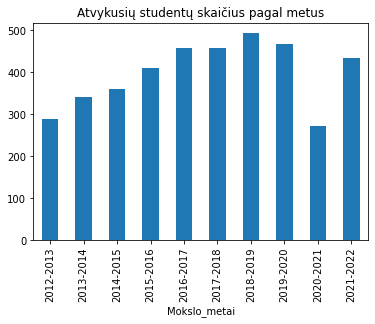

In [22]:
graph(vu)

Į Vytauto Didžiojo universitetą atvykusių studentų skaičius

In [12]:
vdu = university('Vytauto Didžiojo universitetas')
vdu

Mokslo_metai
2012-2013    121
2013-2014    160
2014-2015    127
2015-2016    180
2016-2017    197
2017-2018    216
2018-2019    260
2019-2020    312
2020-2021    115
2021-2022    323
Name: Atvykusių_studentų_skaičius, dtype: int64

<AxesSubplot:title={'center':'Atvykusių studentų skaičius pagal metus'}, xlabel='Mokslo_metai'>

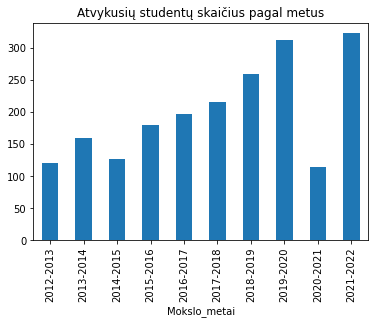

In [23]:
graph(vdu)

Į Mykolo Romerio universitetą atvykusių studentų skaičius

In [14]:
mru = university('Mykolo Romerio universitetas')
mru

Mokslo_metai
2012-2013    121
2013-2014      2
2014-2015    156
2015-2016    234
2016-2017    191
2017-2018    297
2018-2019    327
2019-2020    191
2020-2021    116
2021-2022    293
Name: Atvykusių_studentų_skaičius, dtype: int64

<AxesSubplot:title={'center':'Atvykusių studentų skaičius pagal metus'}, xlabel='Mokslo_metai'>

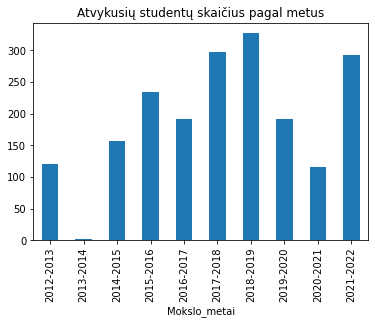

In [24]:
graph(mru)

Į Kauno technologijos universitetą atvykusių studentų skaičius

In [15]:
ktu = university('Kauno technologijos universitetas')
ktu

Mokslo_metai
2012-2013    124
2013-2014    135
2014-2015    161
2015-2016    163
2016-2017    163
2017-2018    142
2018-2019    185
2019-2020    202
2020-2021    122
2021-2022    201
Name: Atvykusių_studentų_skaičius, dtype: int64

<AxesSubplot:title={'center':'Atvykusių studentų skaičius pagal metus'}, xlabel='Mokslo_metai'>

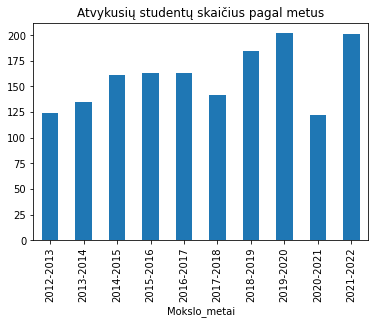

In [25]:
graph(ktu)

## Išvados

1. 2020 m. studijas Lietuvos aukštosiose mokyklose pradėjo 44 % mažiau užsienio valstybių piliečių nei 2019 m, tai net 48 % mažiau nei galima buvo tikėtis pagal prognozę, jei pandemija nebūtų įvykusi. 2020 m. atvykusių studentų skaičius grįžo į priešpandeminį lygį ir buvo lygus 2019 m. atvykusių studentų skaičiui, tačiau tai yra 12,6 % mažiau nei galima buvo tikėtis. 

2. Turimuose duomenyse trūksta informacijos apie 2020-2021 m. atvykusių studentų pilietybę, todėl pagal juos neįmanoma patikrinti Baltarusijos respublikos politinės situacijos įtakos Baltarusijos piliečių atvykimui studijuoti Lietuvos aukštosiose mokyklose.

3. Į Vilniaus Gedimino technikos universitetą studijuoti atvykusių užsienio piliečių skaičius 2019 pakito mažiausiai lyginant su kitomis 4 Lietuvos aukštosiomis mokyklomis, pritraukiančiomis daugiausiai studentų iš užsienio. Tam įtakos galėjo turėti prieš pat Covid-19 pandemiją prasidėjusi aktyvi universiteto vykdoma tarptautiškumo skatinimo programa.